# CODTECH IT SOLUTIONS  [Author - T.Nagaraju, Data science Intern]

### TASK-1 Titanic Survival Prediction

The Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not.

Dataset Sample : https://www.kaggle.com/code/mrisdal/exploring-survival-on-the-titanic/input

In [2]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [3]:
#Reading the data
titanic_data = pd.read_csv('titanic.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
#first five rows of the data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#rows and columns
titanic_data.shape

(418, 12)

In [6]:
#stastical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
#information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
#missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Handling missing values

In [9]:
#drop the data from the database
titanic_data = titanic_data.drop(columns = 'Cabin',axis=1)

In [10]:
#replacing the missing values in 'Age' column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [11]:
#finding the mode value of 'Fare' column
print(titanic_data['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [12]:
print(titanic_data['Fare'].mode()[0])

7.75


In [13]:
#replacing the missing values in 'Fare' column with mode value
titanic_data['Fare'].fillna(titanic_data['Fare'].mode()[0], inplace=True)

In [15]:
#missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
#information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


Data Analysis

In [18]:
#some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [19]:
#finding the people survived and not survived
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Data Visualization

In [20]:
sns.set()

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

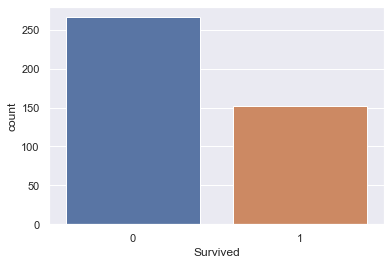

In [21]:
#making a count plot for 'survived' column 
sns.countplot('Survived', data=titanic_data)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

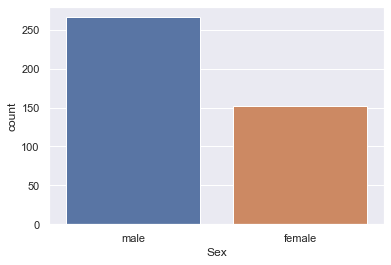

In [22]:
#making a count plot for 'sex' column 
sns.countplot('Sex', data=titanic_data)

In [23]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

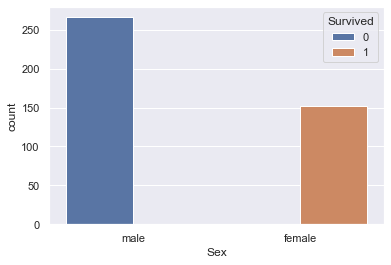

In [24]:
#the number of survivors gender-wise
sns.countplot('Sex', hue='Survived', data=titanic_data)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

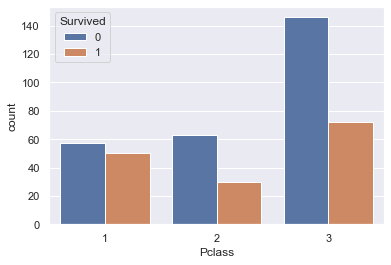

In [25]:
sns.countplot('Pclass', hue='Survived', data=titanic_data)

Encoding the categorical column

In [26]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [27]:
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [28]:
#converting categorial column

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace = True)

In [29]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


Separating features and target

In [30]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [31]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [32]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


Splitting the data iinto training data and Test data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


Modeling Training

Logistic Regression
p = 1 / (1 + e^(-z))         [z = w.X+b]

In [35]:
model = LogisticRegression()

In [36]:
#training the logistic Regression model with training data
model.fit(X_train, Y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation


Accuracy Score

In [37]:
#accuracy on training data
X_train_prediction = model.predict(X_train)

In [38]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [39]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy Score of training data : ', training_data_accuracy)

Accuracy Score of training data :  1.0


In [40]:
#accuracy on test data
X_test_prediction = model.predict(X_test)

In [41]:
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [42]:
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy Score of training data : ', testing_data_accuracy)

Accuracy Score of training data :  1.0


In [43]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64
